# Assignment 2 - Practical Data Science

### Student Name: Athul Varghese Thampan
### Student ID: S3958556

## Task 1: Retrieving and Preparing the Data

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
df = pd.read_csv('buddymove_holidayiq.csv', sep=',', decimal='.')

# print the first 5 rows
df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [2]:
# check the data types
df.dtypes

User Id      object
Sports        int64
Religious     int64
Nature        int64
Theatre       int64
Shopping      int64
Picnic        int64
dtype: object

In [3]:
# check if there are any null values present
df.isnull().values.any()

False

In [4]:
# drop 'User Id'
df = df.drop(columns=['User Id'])
df

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


## Task 2: Data Exploration

In [5]:
df.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000



Descriptive statistics for column 'Sports':
count    249.000000
mean      11.987952
std        6.616501
min        2.000000
25%        6.000000
50%       12.000000
75%       18.000000
max       25.000000
Name: Sports, dtype: float64


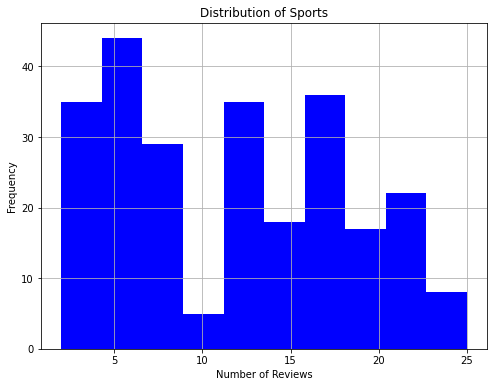


Descriptive statistics for column 'Religious':
count    249.000000
mean     109.779116
std       32.454115
min       50.000000
25%       84.000000
50%      104.000000
75%      132.000000
max      203.000000
Name: Religious, dtype: float64


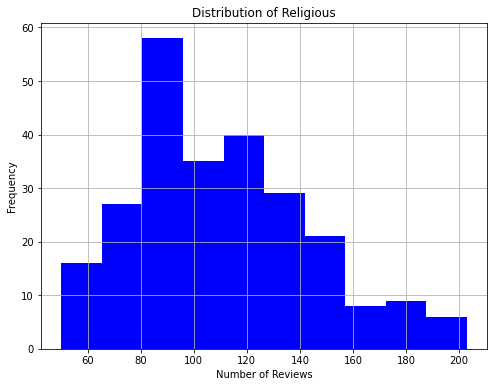


Descriptive statistics for column 'Nature':
count    249.000000
mean     124.518072
std       45.639372
min       52.000000
25%       89.000000
50%      119.000000
75%      153.000000
max      318.000000
Name: Nature, dtype: float64


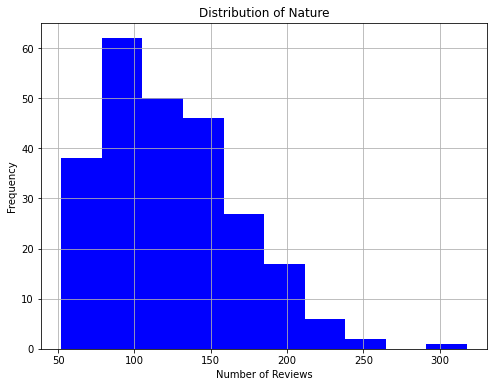


Descriptive statistics for column 'Theatre':
count    249.000000
mean     116.377510
std       32.132696
min       59.000000
25%       93.000000
50%      113.000000
75%      138.000000
max      213.000000
Name: Theatre, dtype: float64


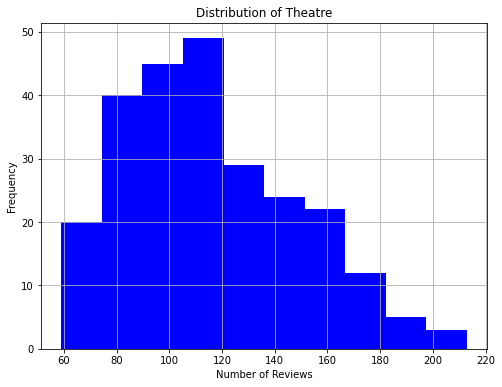


Descriptive statistics for column 'Shopping':
count    249.000000
mean     112.638554
std       41.562888
min       50.000000
25%       79.000000
50%      104.000000
75%      138.000000
max      233.000000
Name: Shopping, dtype: float64


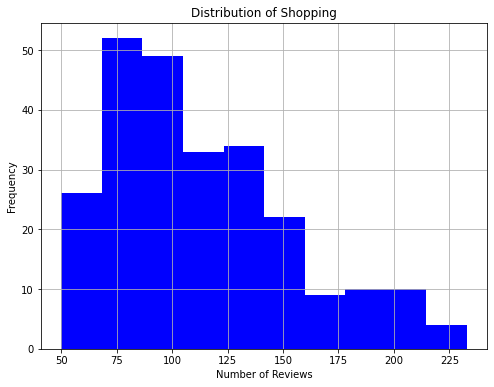


Descriptive statistics for column 'Picnic':
count    249.000000
mean     120.401606
std       32.633339
min       61.000000
25%       92.000000
50%      119.000000
75%      143.000000
max      218.000000
Name: Picnic, dtype: float64


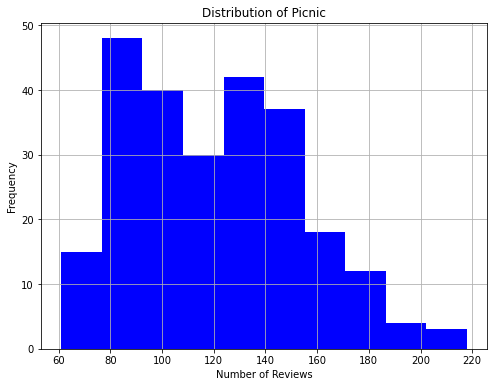

In [6]:
# Explore each column
columns_to_explore = ['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']

for col in columns_to_explore:
    # Calculate descriptive statistics
    print(f"\nDescriptive statistics for column '{col}':")
    print(df[col].describe())
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

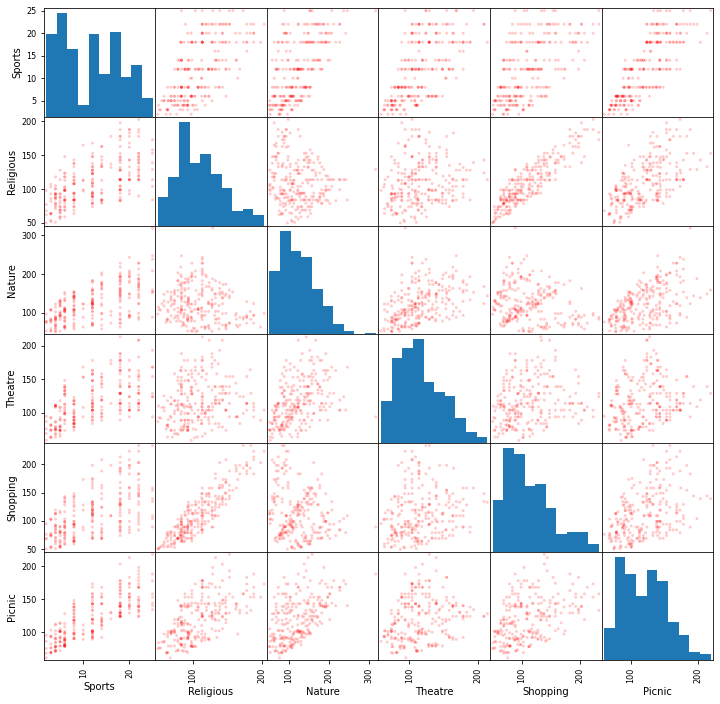

In [7]:
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2,figsize=(12,12),diagonal='hist', color='red')
plt.show()

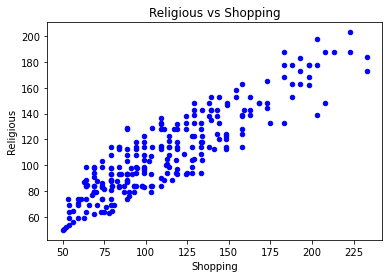

In [8]:
# scatterplot of x='Shopping', y='Religious'
df.plot(kind='scatter', x='Shopping', y='Religious', color='blue')
plt.title('Religious vs Shopping')
plt.show()

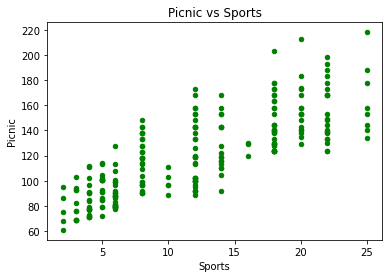

In [9]:
# scatterplot of x='Sports', y='Picnic'
df.plot(kind='scatter', x='Sports', y='Picnic', color='green')
plt.title('Picnic vs Sports')
plt.show()

# Task 3: Data Modelling (Classification)

## Religious vs Shopping 

### Generating train/test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df['Shopping_interest'] = (df['Shopping'] > df['Shopping'].mean()).astype(int)

In [12]:
# Define features X and target Y
X = df[['Religious']].values
y = df['Shopping_interest'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=4)

In [14]:
X_train

array([[188],
       [ 89],
       [173],
       [ 79],
       [114],
       [123],
       [113],
       [ 96],
       [ 83],
       [139],
       [163],
       [109],
       [114],
       [ 94],
       [188],
       [128],
       [128],
       [113],
       [ 82],
       [ 79],
       [ 84],
       [118],
       [148],
       [128],
       [ 56],
       [ 84],
       [103],
       [163],
       [114],
       [ 98],
       [148],
       [143],
       [ 76],
       [105],
       [ 86],
       [ 99],
       [104],
       [ 59],
       [ 69],
       [ 83],
       [144],
       [114],
       [ 79],
       [148],
       [113],
       [ 94],
       [138],
       [ 84],
       [168],
       [ 64],
       [ 93],
       [ 74],
       [ 74],
       [ 87],
       [124],
       [ 98],
       [114],
       [162],
       [198],
       [ 71],
       [118],
       [ 69],
       [114],
       [ 84],
       [ 99],
       [114],
       [ 74],
       [143],
       [188],
       [178],
       [ 99],
      

In [15]:
X_train.shape

(124, 1)

In [16]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [17]:
y_train.shape

(124,)

In [18]:
X_test

array([[ 88],
       [ 93],
       [ 93],
       [ 64],
       [ 98],
       [114],
       [ 89],
       [138],
       [114],
       [103],
       [ 93],
       [168],
       [ 84],
       [ 84],
       [ 94],
       [124],
       [101],
       [109],
       [137],
       [153],
       [ 89],
       [ 93],
       [114],
       [ 88],
       [ 97],
       [ 74],
       [143],
       [ 79],
       [143],
       [114],
       [120],
       [ 84],
       [ 93],
       [ 63],
       [123],
       [139],
       [ 87],
       [ 89],
       [ 84],
       [ 62],
       [ 85],
       [104],
       [ 89],
       [ 84],
       [147],
       [173],
       [113],
       [143],
       [ 93],
       [118],
       [128],
       [ 99],
       [ 84],
       [115],
       [ 59],
       [ 94],
       [108],
       [108],
       [143],
       [ 88],
       [ 99],
       [ 93],
       [128],
       [ 79],
       [113],
       [ 99],
       [ 84],
       [158],
       [ 69],
       [ 64],
       [104],
      

In [19]:
X_test.shape

(125, 1)

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [21]:
y_test.shape

(125,)

### K Nearest Neighbours 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clf = KNeighborsClassifier(3)

In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_predicted = clf.predict(X_test)

In [26]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [27]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[62  8]
 [18 37]]


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        70
           1       0.82      0.67      0.74        55

    accuracy                           0.79       125
   macro avg       0.80      0.78      0.78       125
weighted avg       0.80      0.79      0.79       125



### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()

In [34]:
fit = clf.fit(X_train, y_train)

In [35]:
y_predicted = fit.predict(X_test)

In [36]:
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [37]:
y_predicted.shape

(125,)

In [38]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[63  7]
 [17 38]]


In [39]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        70
           1       0.84      0.69      0.76        55

    accuracy                           0.81       125
   macro avg       0.82      0.80      0.80       125
weighted avg       0.81      0.81      0.80       125



## Picnic vs Sports

### Generating train/test set

In [40]:
df['Picnic_interest'] = (df['Picnic'] > df['Picnic'].mean()).astype(int)

In [41]:
# Define features X and target Y
X = df[['Sports']].values
y = df['Picnic_interest'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=4)

In [43]:
X_train

array([[22],
       [ 6],
       [18],
       [ 4],
       [22],
       [12],
       [10],
       [12],
       [18],
       [22],
       [18],
       [12],
       [18],
       [12],
       [18],
       [12],
       [18],
       [10],
       [ 3],
       [14],
       [ 8],
       [ 8],
       [ 6],
       [ 5],
       [ 5],
       [14],
       [ 6],
       [14],
       [20],
       [ 2],
       [18],
       [22],
       [ 4],
       [18],
       [ 3],
       [ 6],
       [18],
       [ 5],
       [ 5],
       [18],
       [22],
       [18],
       [12],
       [12],
       [ 8],
       [ 8],
       [14],
       [ 8],
       [12],
       [ 3],
       [ 5],
       [ 6],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [18],
       [20],
       [18],
       [ 4],
       [ 6],
       [ 5],
       [22],
       [14],
       [18],
       [20],
       [ 8],
       [14],
       [20],
       [18],
       [ 6],
       [ 8],
       [12],
       [14],
       [ 2],
       [12],
       [22],

In [44]:
X_train.shape

(124, 1)

In [45]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [46]:
y_train.shape

(124,)

In [47]:
X_test

array([[ 4],
       [20],
       [ 4],
       [ 3],
       [ 6],
       [20],
       [12],
       [ 8],
       [18],
       [ 3],
       [12],
       [20],
       [ 8],
       [25],
       [ 8],
       [22],
       [ 4],
       [12],
       [16],
       [22],
       [ 8],
       [ 4],
       [25],
       [ 5],
       [10],
       [ 5],
       [ 8],
       [ 8],
       [20],
       [18],
       [20],
       [14],
       [ 3],
       [ 3],
       [ 6],
       [25],
       [ 4],
       [12],
       [ 6],
       [ 2],
       [ 4],
       [12],
       [12],
       [ 8],
       [18],
       [25],
       [12],
       [18],
       [12],
       [ 4],
       [18],
       [14],
       [ 6],
       [12],
       [ 6],
       [14],
       [ 8],
       [ 8],
       [18],
       [18],
       [18],
       [ 4],
       [18],
       [ 6],
       [14],
       [18],
       [12],
       [25],
       [ 5],
       [ 3],
       [12],
       [10],
       [18],
       [22],
       [ 8],
       [ 8],
       [ 6],

In [48]:
X_test.shape

(125, 1)

In [49]:
y_test

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [50]:
y_test.shape

(125,)

### K Nearest Neighbours

In [51]:
clf = KNeighborsClassifier(3)

In [52]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_predicted = clf.predict(X_test)

In [54]:
y_predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [55]:
y_test

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [56]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[68  0]
 [20 37]]


In [57]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        68
           1       1.00      0.65      0.79        57

    accuracy                           0.84       125
   macro avg       0.89      0.82      0.83       125
weighted avg       0.88      0.84      0.83       125



### Decision Tree

In [58]:
clf = DecisionTreeClassifier()

In [59]:
fit = clf.fit(X_train, y_train)

In [60]:
y_predicted = fit.predict(X_test)

In [61]:
y_predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [62]:
y_predicted.shape

(125,)

In [63]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[67  1]
 [19 38]]


In [64]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        68
           1       0.97      0.67      0.79        57

    accuracy                           0.84       125
   macro avg       0.88      0.83      0.83       125
weighted avg       0.87      0.84      0.83       125

